# WEEK 16 (13/02/18)

### Done

### To Do
* Figure out how to obtain the uncertainty on the optimised gamma ---> can maybe look at the hessian and estimate from there
* then plot bars 
* do the whole of London

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas
import seaborn as sns; sns.set()

from hm.pop_models import pop_random, population
from hm.analysis.scaling.pop_hierarchy import pop_hier
import hm.analysis.scaling.eps_scale
from hm.analysis.scaling.plots import *
from matplotlib import pyplot as plt
from hm.analysis.scaling import gamma_opt
from hm.utils.utils import gamma_est

## 1. Exponential Gravity

Same small London window as in notebook 15.

In [7]:
master_df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/LSOA populations and areas 2011 (merged).csv")
df = master_df[master_df['Easting'] < 561966][master_df['Easting'] > 493024][master_df['Northing'] < 207218][master_df['Northing'] > 150912]
small_df = df[df['Easting'] < 527530][df['Easting'] > 493171][df['Northing'] < 179073.5][df['Northing'] > 150941]

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/Ilaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
d_maxs_lon = [200, 300, 400, 500, 600, 700, 800, 900]
h_lon = pop_hier(small_df, d_maxs_lon)
gamma_0 = gamma_est(np.mean(h_lon.levels[0].pop.locArea), exp=True)

In [11]:
odm = h_lon.gravity_ODM(4, gamma= gamma_0, exp=True)
odm

A Jupyter Widget

array([[  0.        ,  20.18339213,  29.9192857 , ...,   1.55634357,
          1.28729092,   0.75264339],
       [ 21.26724639,   0.        ,  46.63465899, ...,   2.42500507,
          1.95161114,   1.19313129],
       [ 32.64476966,  48.28965341,   0.        , ...,   4.2682649 ,
          3.3302881 ,   2.15626864],
       ..., 
       [  3.99355878,   5.90541132,  10.03791663, ...,   0.        ,
         43.01716321,  33.50384058],
       [  3.03097123,   4.36095186,   7.18661743, ...,  39.47228513,
          0.        ,  19.34520099],
       [  2.52068962,   3.79228745,   6.618668  , ...,  43.72905634,
         27.51682084,   0.        ]])

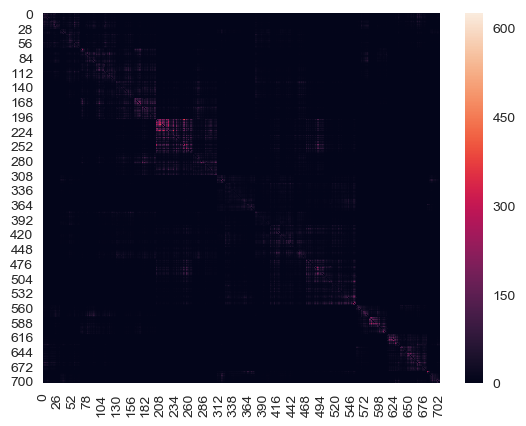

In [12]:
sns.heatmap(odm)
plt.show()

In [13]:
gammas_lon = [gamma_0]
epsilons_lon = []
for i in range(1, len(d_maxs_lon)+1):
    gammas_lon.append(gamma_opt.optimise_eps(h_lon, i, gamma_0, exp=True).x)
    epsilons_lon.append(h_lon.epsilon_to_opt(i, gamma_0, gammas_lon[i], exp=True))

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:41: RuntimeWarning: overflow encountered in exp
  return np.exp(-self.gamma*r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:31: RuntimeWarning: overflow encountered in multiply
  factor.append(self.pop.popDist[j]*self.f(self.pop.DM[i,j]))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:41: RuntimeWarning: overflow encountered in exp
  return np.exp(-self.gamma*r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:31: RuntimeWarning: overflow encountered in multiply
  factor.append(self.pop.popDist[j]*self.f(self.pop.DM[i,j]))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: overflow encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: overflow encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: overflow encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: overflow encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: overflow encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: invalid value encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)


/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:32: RuntimeWarning: overflow encountered in double_scalars
  k_s.append(1./np.sum(factor))


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in multiply
  n = popi * self.K[i] * popj*self.f(r)
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/hm_models/gravity.py:59: RuntimeWarning: overflow encountered in double_scalars
  n = popi * self.K[i] * popj*self.f(r)


A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/analysis/scaling/gamma_opt.py:29: RuntimeWarning: overflow encountered in square
  mean = np.sqrt(np.mean(np.square(eps)))


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

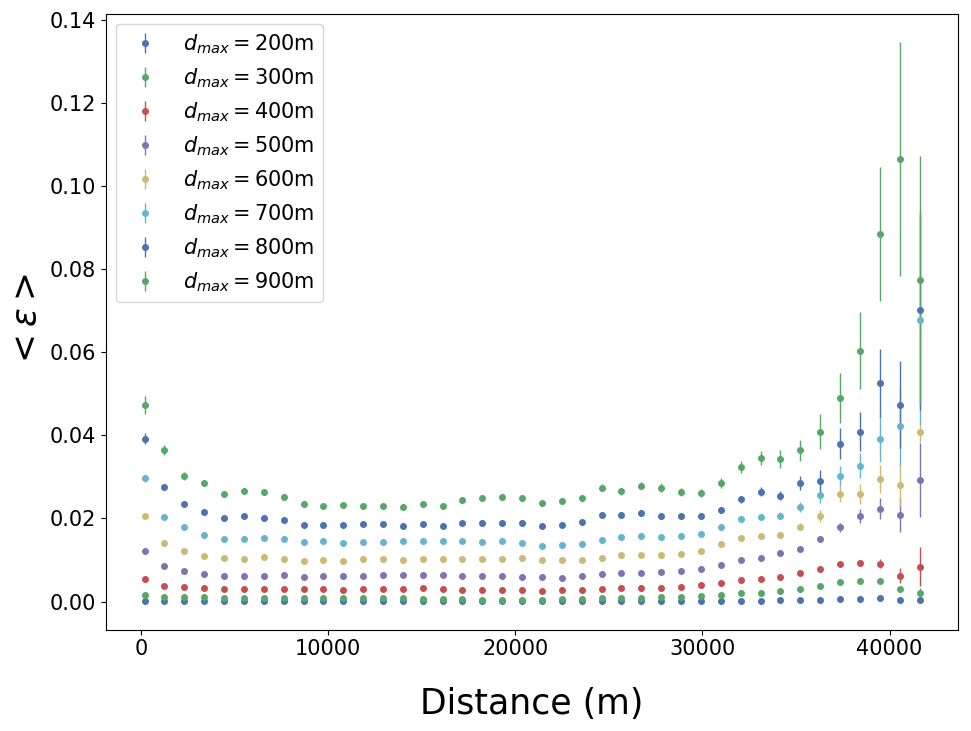

In [14]:
DMList = DM_list(h_lon)
eps_distance_hier(epsilons_lon, DMList, d_maxs_lon, 40)
plt.show()

In [15]:
gammas_lon

[0.00031385986955287848,
 array([ 0.00031386]),
 array([ 0.00031386]),
 array([ 0.00031386]),
 array([ 0.00031386]),
 array([ 0.00031386]),
 array([ 0.00031386]),
 array([ 0.00031386]),
 array([ 0.00031386])]

In [16]:
np.save('epsilons_lon_exp',epsilons_lon)

## Power law gravity - whole London (N.B. this is wrong!!)

So far we've only tried with a small window within London. Let's now run the whole clustering/epsilon/optimisation process on the entire London area.

In [33]:
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

In [39]:
d_maxs = [300, 500, 700, 900, 1100, 1300, 1500, 1700]
h_big_lon = pop_hier(small_df, d_maxs_lon)
gamma_0 = 2.

In [40]:
gammas_big_lon = [gamma_0]
epsilons_big_lon = []
for i in range(1, len(d_maxs)+1):
    gammas_big_lon.append(gamma_opt.optimise_eps(h_big_lon, i, gamma_0).x)
    epsilons_big_lon.append(h_big_lon.epsilon_to_opt(i, gamma_0, gammas_big_lon[i]))

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [41]:
gammas_big_lon

[2.0,
 array([ 2.00117031]),
 array([ 2.0086035]),
 array([ 2.02870045]),
 array([ 2.05383373]),
 array([ 2.08264246]),
 array([ 2.11280735]),
 array([ 2.1338163]),
 array([ 2.15832481])]

In [42]:
epsilons_big_lon

[array([[  0.00000000e+00,   1.56976218e-03,   9.64404485e-04, ...,
          -1.16372934e-03,  -1.18331081e-03,  -1.36629885e-03],
        [  1.28945854e-03,   0.00000000e+00,   1.61059331e-03, ...,
          -1.34774711e-03,  -1.38111726e-03,  -1.55981073e-03],
        [  1.11186004e-04,   1.03837953e-03,   0.00000000e+00, ...,
          -1.89541272e-03,  -1.94444037e-03,  -2.10149699e-03],
        ..., 
        [ -1.58695034e-04,  -6.17663871e-05,  -3.55713982e-05, ...,
           0.00000000e+00,   2.01491155e-03,   1.58206425e-03],
        [ -2.38777860e-04,  -1.55609667e-04,  -1.45023376e-04, ...,
           1.95452324e-03,   0.00000000e+00,   1.04352367e-03],
        [ -1.37606292e-04,  -5.01223125e-05,  -1.78449647e-05, ...,
           1.80508510e-03,   1.32709475e-03,   0.00000000e+00]]),
 array([[ 0.        ,  0.01145588,  0.0070412 , ..., -0.00861409,
         -0.00875912, -0.01011531],
        [ 0.00940484,  0.        ,  0.01174407, ..., -0.00998691,
         -0.01023437, -0

A Jupyter Widget

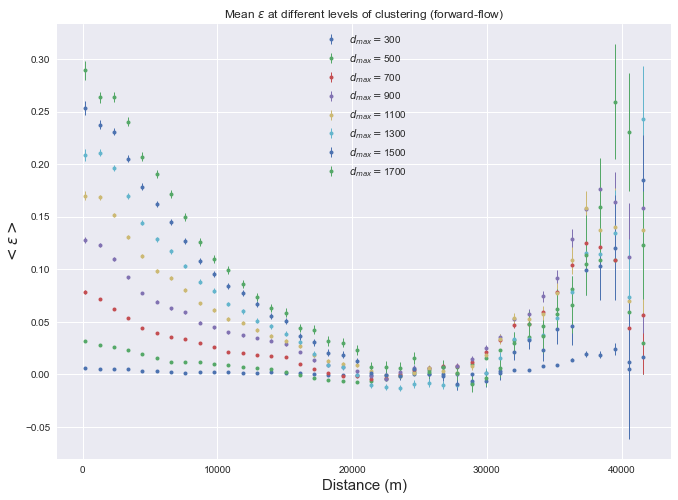

In [43]:
DMList = DM_list(h_big_lon)
eps_distance_hier(epsilons_big_lon, DMList, d_maxs, 40)
plt.show()